# Python Libraries

In [56]:
#importing necessary library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Data Read In

In [57]:
#Read-in the dataset
df = pd.read_csv('https://raw.githubusercontent.com/delinai/schulich_ds1_2024/main/Datasets/Assignment1_StreamFlow_Subscription_Data.csv')
df.head()

,User_ID,Age,Gender,Location,Subscription_Start_Date,Subscription_Type,Monthly_Payment,Payment_Method,Monthly_Hours_Watched,Favorite_Genre,Devices_Used,Average_Session_Length,Content_ID,Rating_Given,Churned,Date_of_Churn,Reason_for_Churn
0,1,56,Other,Central,2020-06-07 01:53:37.656934,Premium,19.99,Credit Card,31.513153,Action,PC,1.195762,1023,5,0,NaN,NaN
1,2,69,Other,West,2024-02-21 01:53:37.656980,Standard,14.99,Credit Card,4.982277,Drama,PC,0.809002,1076,1,0,NaN,NaN
2,3,46,Female,North,2022-10-06 01:53:37.656995,Standard,14.99,PayPal,4.114953,Sci-Fi,Tablet,1.153570,1095,2,0,NaN,NaN
3,4,32,Female,East,2022-01-04 01:53:37.657006,Standard,14.99,Credit Card,60.244820,Action,TV,0.609503,1003,1,0,NaN,NaN
4,5,60,Female,North,2020-03-13 01:53:37.657017,Standard,14.99,Credit Card,4.711855,Sci-Fi,Mobile,0.359971,1012,4,0,NaN,NaN


In [58]:
# Display the summary information of the DataFrame including the data types of each column 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   User_ID                  1000 non-null   int64  
 1   Age                      1000 non-null   int64  
 2   Gender                   1000 non-null   object 
 3   Location                 1000 non-null   object 
 4   Subscription_Start_Date  1000 non-null   object 
 5   Subscription_Type        1000 non-null   object 
 6   Monthly_Payment          1000 non-null   float64
 7   Payment_Method           1000 non-null   object 
 8   Monthly_Hours_Watched    1000 non-null   float64
 9   Favorite_Genre           1000 non-null   object 
 10  Devices_Used             1000 non-null   object 
 11  Average_Session_Length   1000 non-null   float64
 12  Content_ID               1000 non-null   int64  
 13  Rating_Given             1000 non-null   int64  
 14  Churned                  

In [59]:
# Calculate the number of days each customer used the service before churning by subtracting the Subscription_Start_Date' from the 'Date_of_Churn'. 
# The result is converted to a number of days using the '.dt.days'
df['Subscription_Start_Date'] = pd.to_datetime(df['Subscription_Start_Date']) 
df['Date_of_Churn'] = pd.to_datetime(df['Date_of_Churn']) 
df['days_used'] = (df['Date_of_Churn'] - df['Subscription_Start_Date']).dt.days

# Display the summary information of the DataFrame including the data types of each column 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   User_ID                  1000 non-null   int64         
 1   Age                      1000 non-null   int64         
 2   Gender                   1000 non-null   object        
 3   Location                 1000 non-null   object        
 4   Subscription_Start_Date  1000 non-null   datetime64[ns]
 5   Subscription_Type        1000 non-null   object        
 6   Monthly_Payment          1000 non-null   float64       
 7   Payment_Method           1000 non-null   object        
 8   Monthly_Hours_Watched    1000 non-null   float64       
 9   Favorite_Genre           1000 non-null   object        
 10  Devices_Used             1000 non-null   object        
 11  Average_Session_Length   1000 non-null   float64       
 12  Content_ID               1000 non-n

In [60]:
# Generate descriptive statistics. This method provides a quick overview of the numerical columns in the DataFrame
# count, mean, standard deviation, minimum, maximum, and the quartiles (25%, 50%, and 75%).
df.describe()

,User_ID,Age,Subscription_Start_Date,Monthly_Payment,Monthly_Hours_Watched,Average_Session_Length,Content_ID,Rating_Given,Churned,Date_of_Churn,days_used
count,1000.000000,1000.000000,1000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,246,246.000000
mean,500.500000,44.385000,2021-09-18 17:08:01.662466560,14.580000,19.071653,1.893771,1049.201000,3.030000,0.246000,2022-02-28 15:27:17.174715904,195.357724
min,1.000000,18.000000,2019-05-10 01:53:37.659073,9.990000,0.041574,0.000486,1000.000000,1.000000,0.000000,2019-08-11 01:53:37.658920,30.000000
25%,250.750000,31.750000,2020-05-15 19:53:37.664891136,9.990000,5.490739,0.548918,1023.000000,2.000000,0.000000,2020-11-15 07:53:37.659917824,115.000000
50%,500.500000,45.000000,2021-08-21 01:53:37.662536448,14.990000,13.361219,1.271808,1048.000000,3.000000,0.000000,2021-11-20 01:53:37.661230336,201.000000
75%,750.250000,57.000000,2023-01-09 07:53:37.664328192,14.990000,26.471636,2.623575,1075.000000,4.000000,0.000000,2023-06-05 01:53:37.660055808,276.750000
max,1000.000000,70.000000,2024-05-06 01:53:37.662112,19.990000,139.170408,11.417557,1099.000000,5.000000,1.000000,2025-02-09 01:53:37.661719,364.000000
std,288.819436,15.321669,NaN,3.404922,19.279140,1.868852,29.268058,1.422365,0.430894,NaN,95.483742


# Analysis of Churn Rate by Subscription Type, Favourite Genre and Age Group

In [61]:
############################### Subscription Type ###############################

# Calculate the churn rate by subscription type by aggregating the count of users and the churn rate as a percentage.
churn_rate_by_subscription = df.groupby('Subscription_Type').agg(
    user_count=('User_ID', 'count'),  # Count the number of users in each subscription type
    churn_rate=('Churned', lambda x: (x.sum() / x.count()) * 100)  # Calculate churn rate as percentage
)


############################### Favourite Genre ###############################

# Calculate the churn rate by favourite genre by aggregating the count of users and the churn rate as a percentage.
churn_rate_by_fav_genre = df.groupby('Favorite_Genre').agg(
    user_count=('User_ID', 'count'),  # Count the number of users in each genre
    churn_rate=('Churned', lambda x: (x.sum() / x.count()) * 100)  # Calculate churn rate as percentage
)

############################### Age Group ###############################

# Define age bins and labels for categorizing users into age groups.
age_bins = [18, 25, 35, 45, 55, 65, 70]
age_labels = ['18-24', '25-34', '35-44', '45-54', '55-64', '65-70']
df['Age_Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)

# Calculate the churn rate by age group, including the average days used before churn.
churn_rate_by_age_group = df.groupby('Age_Group').agg(
    user_count=('User_ID', 'count'),  # Count the number of users in each age group
    churn_rate=('Churned', lambda x: (x.sum() / x.count()) * 100),  # Calculate churn rate as percentage
    days_used = ('days_used', 'mean')
)


# Display the churn rate by subscription type
print("Churn Rate By Subsciption Type: \n", churn_rate_by_subscription)
print("--------------------------------------------------------------")

# Display the churn rate by favourite genre
print("Churn Rate By Favourite Genre: \n", churn_rate_by_fav_genre)
print("--------------------------------------------------------------")

# Display the churn rate by age group
print("Churn Rate By Age Group: \n", churn_rate_by_age_group)

Churn Rate By Subsciption Type: 
                    user_count  churn_rate
Subscription_Type                        
Basic                     276   26.449275
Premium                   194   25.257732
Standard                  530   23.396226
--------------------------------------------------------------
Churn Rate By Favourite Genre: 
                 user_count  churn_rate
Favorite_Genre                        
Action                 205   23.902439
Comedy                 203   24.137931
Documentary            188   27.659574
Drama                  212   22.169811
Sci-Fi                 192   25.520833
--------------------------------------------------------------
Churn Rate By Age Group: 
            user_count  churn_rate   days_used
Age_Group                                    
18-24             130   25.384615  175.848485
25-34             176   26.136364  192.260870
35-44             188   32.978723  209.258065
45-54             214   17.289720  202.162162
55-64             164

/var/folders/kv/6kn50zx13db29c7_5l_npqc40000gn/T/ipykernel_7330/1598855906.py:26: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_rate_by_age_group = df.groupby('Age_Group').agg(


In [62]:
# Group the DataFrame by Genre and calculate the number of unique content IDs for each subscription type
print("Count of Unique Content for each Genre:")
df.groupby('Favorite_Genre')['Content_ID'].nunique()

Count of Unique Content for each Genre:


Favorite_Genre
Action         83
Comedy         90
Documentary    92
Drama          87
Sci-Fi         81
Name: Content_ID, dtype: int64

# Analysis of Monthly Hours Watched


Text(0, 0.5, 'Monthly Hours Watched')

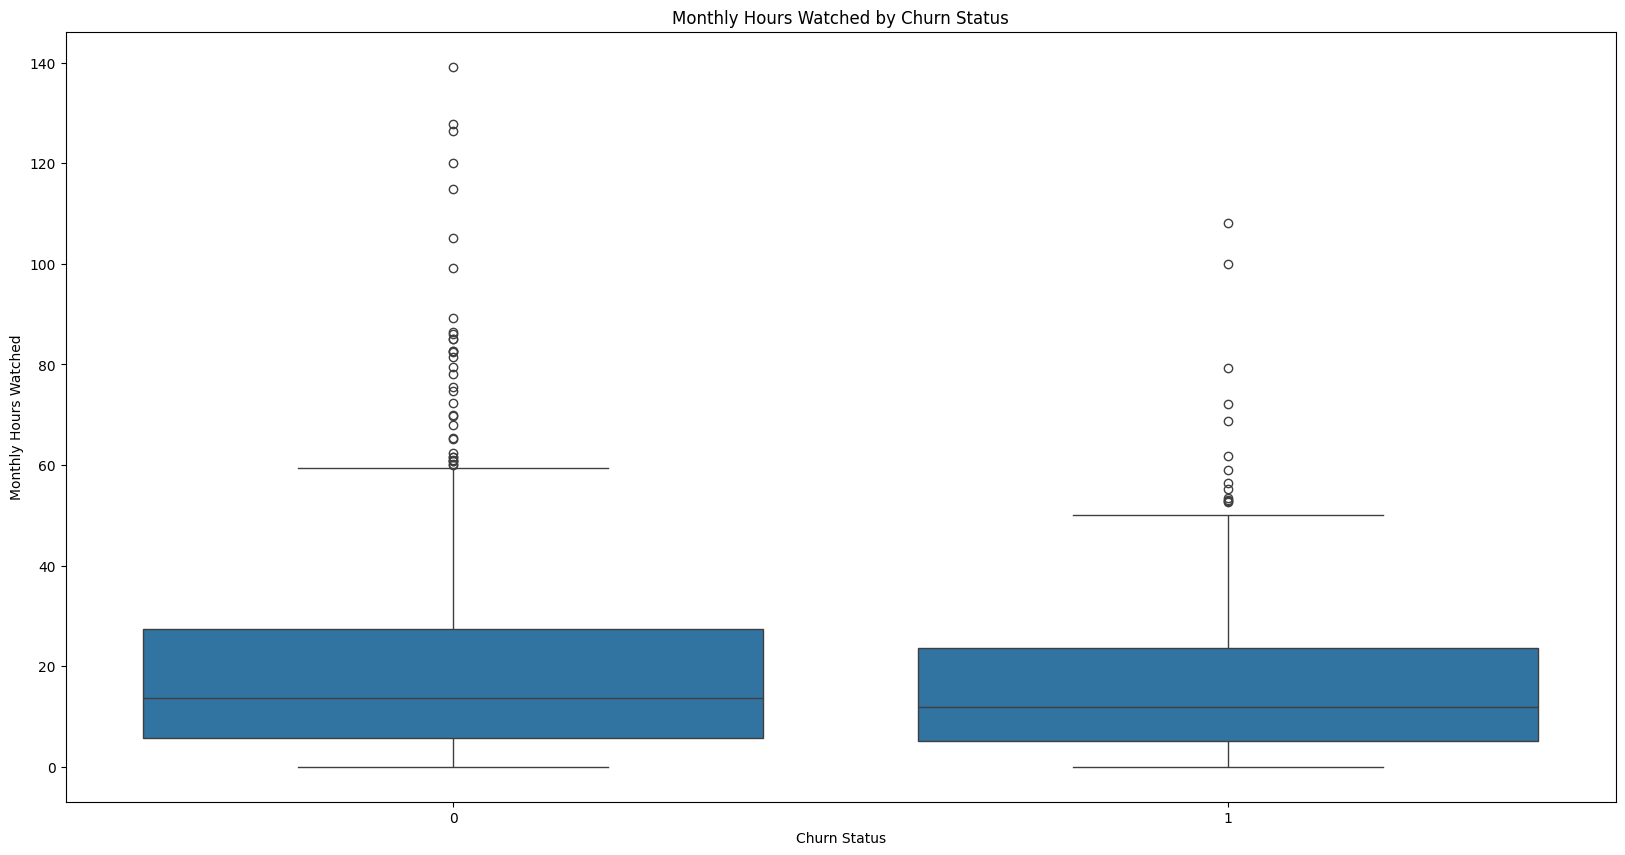

In [63]:
# Create a figure with specified dimensions.
plt.figure(figsize = (20,10))

# Create a subplot in the figure.
axes = plt.subplot()

# Plot a boxplot to visualize the distribution of 'Monthly_Hours_Watched' split by 'Churned' status.
sns.boxplot(x='Churned', y='Monthly_Hours_Watched', data=df, ax=axes)

# Set the title and the labels
axes.set_title('Monthly Hours Watched by Churn Status')
axes.set_xlabel('Churn Status')
axes.set_ylabel('Monthly Hours Watched')

In [64]:
# Filter the DataFrame to include only churned users
churn_df = df[df['Churned'] == 1]

# Group the churned users by 'Age_Group' and count the number of users in each age group
age_grp = churn_df.groupby(['Age_Group']).size().reset_index(name='Count')
print("For Churned Users - Count of Users for each Age Group: \n", age_grp)

For Churned Users - Count of Users for each Age Group: 
   Age_Group  Count
0     18-24     33
1     25-34     46
2     35-44     62
3     45-54     37
4     55-64     34
5     65-70     31


/var/folders/kv/6kn50zx13db29c7_5l_npqc40000gn/T/ipykernel_7330/500400182.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_grp = churn_df.groupby(['Age_Group']).size().reset_index(name='Count')


In [65]:
# Group the churned users by 'Age_Group' and the average session Length in each age group
age_dev_used = churn_df.groupby('Age_Group')['Average_Session_Length'].mean()
print("For Churned Users - Average Session Length for Each Age Group:\n",age_dev_used)

For Churned Users - Average Session Length for Each Age Group:
 Age_Group
18-24    2.242366
25-34    2.248774
35-44    1.586310
45-54    2.305275
55-64    1.849466
65-70    1.382214
Name: Average_Session_Length, dtype: float64


/var/folders/kv/6kn50zx13db29c7_5l_npqc40000gn/T/ipykernel_7330/1118971047.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_dev_used = churn_df.groupby('Age_Group')['Average_Session_Length'].mean()


Text(0, 0.5, 'Avg Session Length')

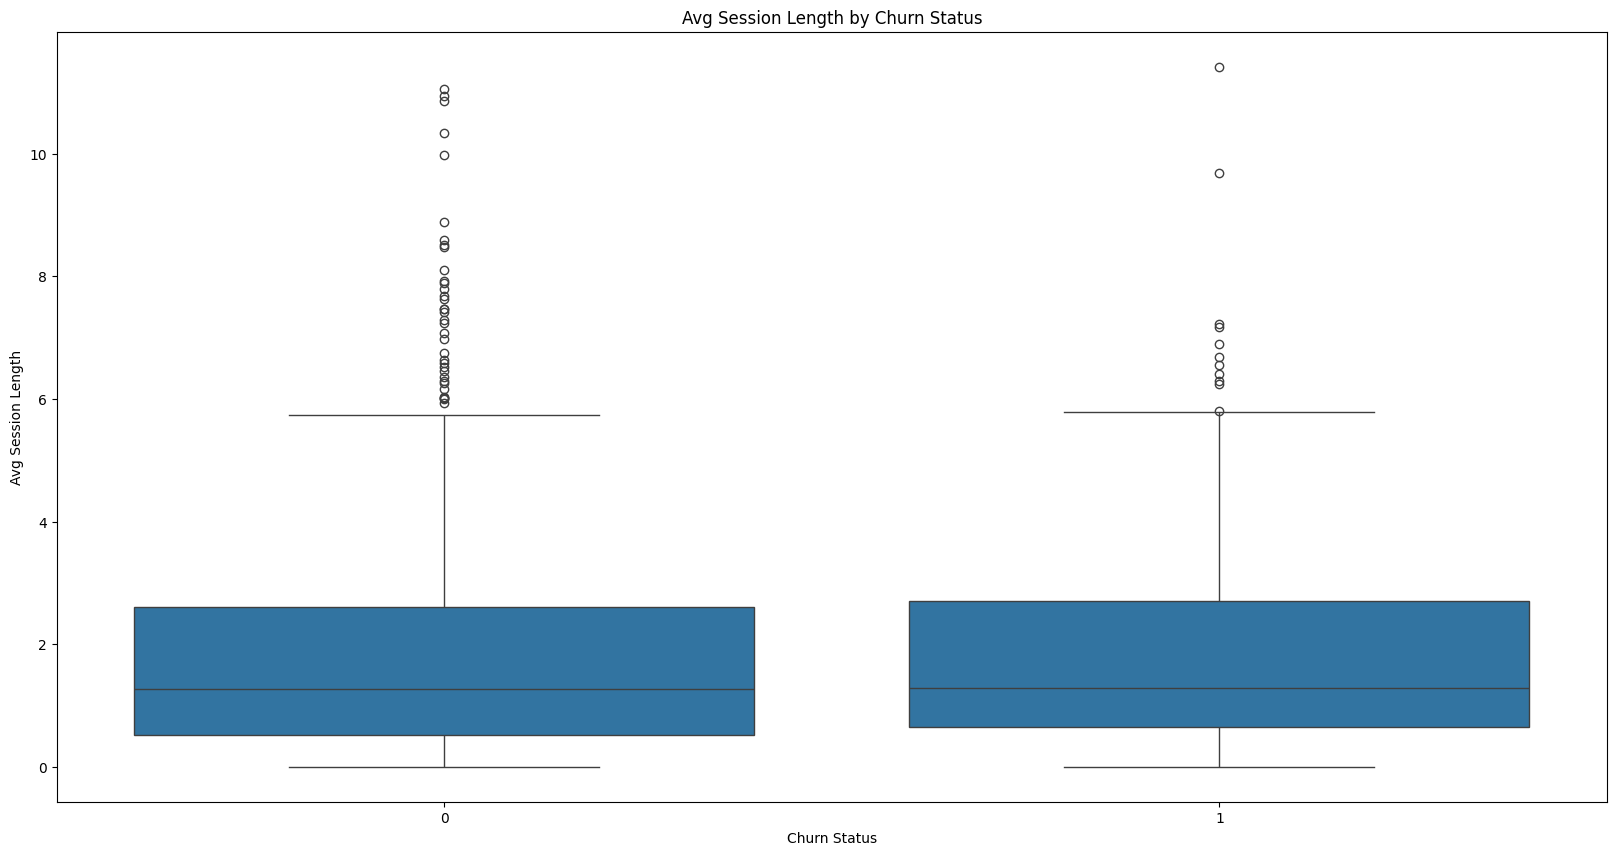

In [66]:
# Create a figure with specified dimensions.
plt.figure(figsize = (20,10))

# Create a subplot in the figure.
axes = plt.subplot()

# Plot a boxplot to visualize the distribution of 'Average_Session_Length' split by 'Churned' status.
sns.boxplot(x='Churned', y='Average_Session_Length', data=df, ax=axes)

# Set the title and the labels
axes.set_title('Avg Session Length by Churn Status')
axes.set_xlabel('Churn Status')
axes.set_ylabel('Avg Session Length')

In [67]:
# This code counts the number of churned users for each device used
dev_used = churn_df.groupby(['Devices_Used', 'Age_Group']).size()
print("For Churned Users - Count of Users for Each Device and Age Group: \n", dev_used)

For Churned Users - Count of Users for Each Device and Age Group: 
 Devices_Used  Age_Group
Mobile        18-24        15
              25-34        27
              35-44        32
              45-54        19
              55-64        20
              65-70        16
PC            18-24         5
              25-34         6
              35-44         5
              45-54         1
              55-64         3
              65-70         7
TV            18-24         8
              25-34         4
              35-44        16
              45-54         7
              55-64         4
              65-70         4
Tablet        18-24         5
              25-34         9
              35-44         9
              45-54        10
              55-64         7
              65-70         4
dtype: int64


/var/folders/kv/6kn50zx13db29c7_5l_npqc40000gn/T/ipykernel_7330/1527478382.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dev_used = churn_df.groupby(['Devices_Used', 'Age_Group']).size()


In [68]:
# This code counts the average session length for each device used for churned users
avg_dev_used = churn_df.groupby('Devices_Used')['Average_Session_Length'].mean()
print("For Churned Users - Average Session Length for Each Device Type: \n",avg_dev_used)

For Churned Users - Average Session Length for Each Device Type: 
 Devices_Used
Mobile    1.822503
PC        2.127004
TV        1.611610
Tablet    2.392278
Name: Average_Session_Length, dtype: float64


# Analysis of Ratings Given and Content


In [69]:
# Calculate average content rating given by all users
avg_rating = df['Rating_Given'].mean()

# Calculate average content rating given by churned users
avg_rating_churned = df[df['Churned'] == 1]['Rating_Given'].mean()

# Calculate average content rating given by non-churned users
avg_rating_non_churned = df[df['Churned']== 0]['Rating_Given'].mean()

# Show the calculated values
print("Average content rating given by all users:", avg_rating)
print("Average content rating given by churned users:", avg_rating_churned)
print("Average content rating given by non-churned users:", avg_rating_non_churned)

Average content rating given by all users: 3.03
Average content rating given by churned users: 2.5934959349593494
Average content rating given by non-churned users: 3.1724137931034484


In [70]:
# Group the DataFrame by 'Favorite_Genre' and calculate the average 'Rating_Given' for each genre
rating1 = df.groupby('Favorite_Genre')["Rating_Given"].mean()
print("Average Rating for Each Genre: \n",rating1)

Average Rating for Each Genre: 
 Favorite_Genre
Action         3.029268
Comedy         3.142857
Documentary    2.925532
Drama          3.084906
Sci-Fi         2.953125
Name: Rating_Given, dtype: float64


In [71]:

############################### Subscription Type and Genre ###############################

# Calculate the churn rate by subscription type and favourite genre by aggregating the count of users and the churn rate as a percentage.
churn_rate_by_genre_type = df.groupby(['Subscription_Type', 'Favorite_Genre']).agg(
    user_count=('User_ID', 'count'),  # Count the number of users in each genre
    churn_rate=('Churned', lambda x: (x.sum() / x.count()) * 100),  # Calculate churn rate as percentage
    ratings = ('Rating_Given', 'mean')
)

# Display the churn rate by subscription type and favourite genre
print("Churn Rate By Subscritiption Type and Favourite Genre: \n", churn_rate_by_genre_type)

Churn Rate By Subscritiption Type and Favourite Genre: 
                                   user_count  churn_rate   ratings
Subscription_Type Favorite_Genre                                  
Basic             Action                  50   26.000000  2.540000
                  Comedy                  44   22.727273  3.272727
                  Documentary             54   24.074074  2.907407
                  Drama                   67   19.402985  3.238806
                  Sci-Fi                  61   39.344262  3.032787
Premium           Action                  44   27.272727  2.977273
                  Comedy                  37   24.324324  2.891892
                  Documentary             33   33.333333  2.606061
                  Drama                   41   26.829268  3.292683
                  Sci-Fi                  39   15.384615  3.025641
Standard          Action                 111   21.621622  3.270270
                  Comedy                 122   24.590164  3.172131
     

# Analysis on Reason for Churn

[nan 'Found better service' 'Price increase' 'Dissatisfied with content'
 'Personal reasons']
Reason_for_Churn
Price increase               68
Found better service         64
Personal reasons             62
Dissatisfied with content    52
Name: count, dtype: int64


/var/folders/kv/6kn50zx13db29c7_5l_npqc40000gn/T/ipykernel_7330/1457667046.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=reason_counts.values, x=reason_counts.index, palette='viridis')


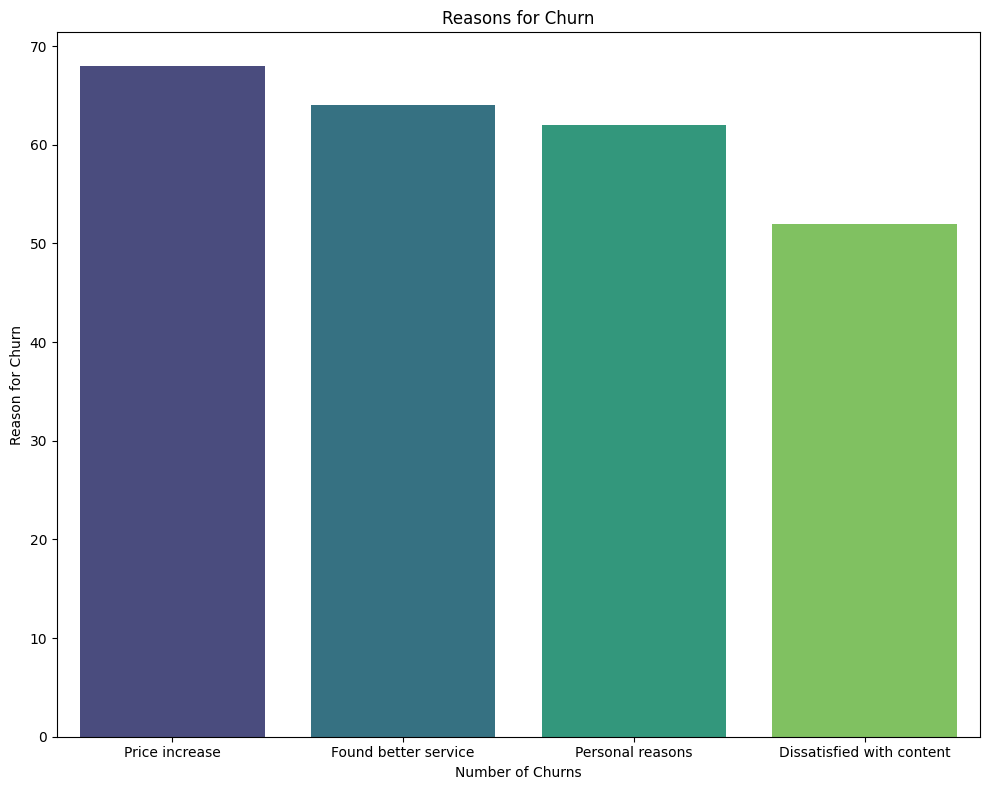

In [72]:
# Check for unique entries in the 'Reason_for_Churn' column
print(df['Reason_for_Churn'].unique())

# Summarize the reasons for churn
reason_counts = df['Reason_for_Churn'].value_counts()
print(reason_counts)

# Set the size of the figure for better visualization
plt.figure(figsize=(10, 8))

# Create a bar plot to visualize the distribution of reasons for 'Churned' status.
sns.barplot(y=reason_counts.values, x=reason_counts.index, palette='viridis')

# Set the title and the labels
plt.title('Reasons for Churn')
plt.xlabel('Number of Churns')
plt.ylabel('Reason for Churn')

# Adjust layout to prevent clipping of labels
plt.tight_layout() 

In [73]:
# Group the DataFrame by subscription type and calculate the number of unique content IDs for each subscription type
df.groupby('Subscription_Type')['Content_ID'].nunique()

Subscription_Type
Basic        92
Premium      86
Standard    100
Name: Content_ID, dtype: int64

In [74]:
# Calculate the churn rate by age group and favourite genre by aggregating the count of users and the average rating givem.
fav_ratings = df.groupby(['Age_Group', 'Favorite_Genre']).agg(
    user_count=('User_ID', 'count'),  # Count the number of users in each age group
    ratings = ('Rating_Given', 'mean') # Average of ratings givem
)

print("Average Rating Given by Each Age Group for the Genres \n",fav_ratings)

Average Rating Given by Each Age Group for the Genres 
                           user_count   ratings
Age_Group Favorite_Genre                      
18-24     Action                  28  3.285714
          Comedy                  19  3.368421
          Documentary             22  2.772727
          Drama                   28  3.071429
          Sci-Fi                  33  3.333333
25-34     Action                  35  2.628571
          Comedy                  38  3.210526
          Documentary             36  2.972222
          Drama                   40  3.400000
          Sci-Fi                  27  2.777778
35-44     Action                  36  3.361111
          Comedy                  44  2.863636
          Documentary             40  2.925000
          Drama                   42  3.190476
          Sci-Fi                  26  2.846154
45-54     Action                  41  2.975610
          Comedy                  54  3.462963
          Documentary             30  2.566667
    

/var/folders/kv/6kn50zx13db29c7_5l_npqc40000gn/T/ipykernel_7330/560976737.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fav_ratings = df.groupby(['Age_Group', 'Favorite_Genre']).agg(


### Analysis for Reason on Price Increase

In [75]:
# Filter the DataFrame to extract rows where the reason for churn is "Price increase"
price_inc_df = df[df['Reason_for_Churn'] == "Price increase"]

# Count the occurrences of each subscription type within the subset
check_subs_type = price_inc_df['Subscription_Type'].value_counts()
print("For Price Increase: Count for each", check_subs_type)


For Price Increase: Count for each Subscription_Type
Standard    35
Premium     18
Basic       15
Name: count, dtype: int64


### Analysis for Reason on Found Better Service

In [76]:
# Filter the DataFrame to extract rows where the reason for churn is "Found better service"
service_df = df[df['Reason_for_Churn'] == "Found better service"]

# Count the occurrences of each subscription type within the subset
service_content = service_df['Subscription_Type'].value_counts()
print("For Found Better Service: Count for each", service_content)

For Found Better Service: Count for each Subscription_Type
Standard    37
Basic       16
Premium     11
Name: count, dtype: int64


### Analysis for Reason on Content Dissatisfaction

In [77]:
# Filter the DataFrame to extract rows where the reason for churn is "Dissatisfied with content"
content_df = df[df['Reason_for_Churn'] == "Dissatisfied with content"]

# Count the occurrences of each favorite genre within the subset
check_content = content_df['Favorite_Genre'].value_counts()
print("For Content Dissatisfaction: Count for each", check_content)

print("-------------------------------------------------------------")

# Group the filtered DataFrame content_df by favorite genre and calculate the number of unique content IDs in each group
unique_content = content_df.groupby('Favorite_Genre')['Content_ID'].nunique()
print("For Content Dissatisfaction: Unique Number of Content ID for each", unique_content)

print("-------------------------------------------------------------")

# Group the filtered DataFrame content_df by age group, calculate the mean rating given in each group, and sort the results by age group
rating1 = content_df.groupby('Age_Group')['Rating_Given'].mean().sort_index()
print("For Content Dissatisfaction: Ratings given by each", rating1)


For Content Dissatisfaction: Count for each Favorite_Genre
Sci-Fi         13
Action         12
Drama          11
Comedy         11
Documentary     5
Name: count, dtype: int64
-------------------------------------------------------------
For Content Dissatisfaction: Unique Number of Content ID for each Favorite_Genre
Action         12
Comedy         10
Documentary     5
Drama           9
Sci-Fi         13
Name: Content_ID, dtype: int64
-------------------------------------------------------------
For Content Dissatisfaction: Ratings given by each Age_Group
18-24    2.500000
25-34    2.500000
35-44    2.636364
45-54    3.363636
55-64    2.900000
65-70    2.500000
Name: Rating_Given, dtype: float64


/var/folders/kv/6kn50zx13db29c7_5l_npqc40000gn/T/ipykernel_7330/4169009056.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rating1 = content_df.groupby('Age_Group')['Rating_Given'].mean().sort_index()


In [78]:
# Filter the DataFrame to extract rows where the subscription type is "Basic"
bas_df = df[df['Subscription_Type'] == "Basic"]

# Group the "Basic" DataFrame by content ID and count the occurrences of each content ID
bas_summ = bas_df.groupby('Content_ID').size().reset_index()

# Print the summary of unique content IDs and their counts for the "Basic" subscription type
print(bas_summ)

print("------------------------------------------------------------------")

# Filter the DataFrame to extract rows where the subscription type is "Standard"
std_df = df[df['Subscription_Type'] == "Standard"]

# Group the "Standard" DataFrame by content ID and count the occurrences of each content ID
std_summ = std_df.groupby('Content_ID').size().reset_index()

# Print the summary of unique content IDs and their counts for the "Standard" subscription type
print(std_summ)

    Content_ID  0
0         1000  2
1         1001  2
2         1002  1
3         1003  1
4         1004  2
..         ... ..
87        1095  3
88        1096  5
89        1097  3
90        1098  5
91        1099  4

[92 rows x 2 columns]
------------------------------------------------------------------
    Content_ID  0
0         1000  2
1         1001  7
2         1002  5
3         1003  7
4         1004  7
..         ... ..
95        1095  4
96        1096  4
97        1097  3
98        1098  5
99        1099  5

[100 rows x 2 columns]


In [79]:
# Merge the summaries of unique content IDs and their counts for the "Standard" and "Basic" subscription types
df_merged1 = pd.merge(std_summ, bas_summ, on='Content_ID', how='left')
df_merged2 = pd.merge(bas_summ,std_summ, on='Content_ID', how='left')

In [80]:
# Filter the merged DataFrame df_merged1 to extract rows where the count of content IDs for the "Basic" subscription type is NaN
print("The 8 additional Contents being offered to Standard Users as compared to Basic Users:")
df_merged1[df_merged1['0_y'].isna()]

The 8 additional Contents being offered to Standard Users as compared to Basic Users:


,Content_ID,0_x,0_y
29,1029,6,NaN
38,1038,2,NaN
51,1051,7,NaN
60,1060,4,NaN
71,1071,9,NaN
73,1073,9,NaN
87,1087,6,NaN
88,1088,13,NaN


In [81]:
# Filter the merged DataFrame df_merged2 to extract rows where the count of content IDs for the "Standard" subscription type is NaN
df_merged2[df_merged2['0_y'].isna()]

,Content_ID,0_x,0_y


In [82]:
# Calculate total subscribers and churned users
total_subscribers = df.shape[0]
total_churned_users = df[df['Date_of_Churn'].notnull()].shape[0]

# Calculate average churn rate
avg_churn_rate = (total_churned_users / total_subscribers) * 100

print("Total Subscribers:", total_subscribers)
print("Total Churned Users:", total_churned_users)
print("Average Churn Rate from 2019 to 2024:", avg_churn_rate)

Total Subscribers: 1000
Total Churned Users: 246
Average Churn Rate from 2019 to 2024: 24.6
